In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import numpy as np
from datetime import datetime
import os
from pathlib import Path


#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


ModuleNotFoundError: No module named 'sinaplot'

In [50]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"

#Location = r"C:\\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Membrane_valve_leak_test"
Foldernames = ["/Data/v3"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 6
Loading... Folder 1 of 1, Sample 2 of 6
Loading... Folder 1 of 1, Sample 3 of 6
Loading... Folder 1 of 1, Sample 4 of 6
Loading... Folder 1 of 1, Sample 5 of 6
Loading... Folder 1 of 1, Sample 6 of 6


In [42]:
data[1]['Samplename'][0]

'DS30_r9_t1_L11_n30'

C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


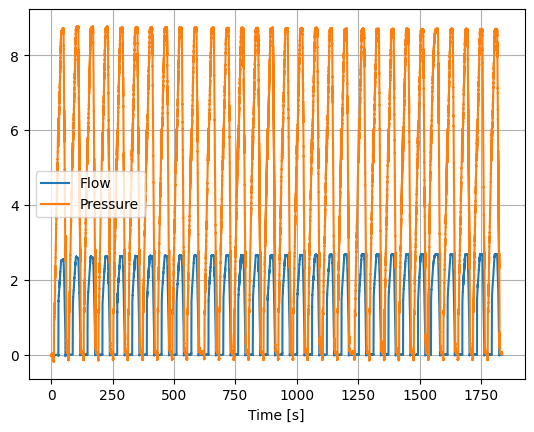

In [37]:
#Plot the profiles over time
#k =0
for i, df in enumerate(data[0]):
    flow = data[0][i]['AWM5-5'].values #SLPM
    time = data[0][i]['Time']
    #P_setpoint = data[0][i]['presFesto-1'].values
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'presFesto-1' in df.columns:
        P_setpoint = data[0][i]['presFesto-1'].values
    elif 'presFesto-0' in df.columns:
        P_setpoint = data[0][i]['presFesto-0'].values

    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        # Skip this iteration and move to the next experiment

    if i ==1:
        break
        

plt.plot(time,flow, label = 'Flow')
plt.plot(time,P/1000, label = "Pressure")
#plt.plot(time, P_setpoint)
#plt.plot(time,data[0][i]['presFesto-1']*100,label ="P setpoint")
plt.legend()
plt.xlabel('Time [s]')
#plt.ylim(-0.1,0.1)
plt.grid()

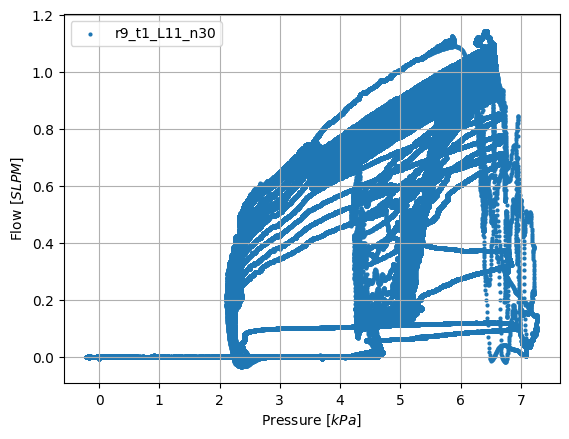

In [11]:
plt.figure()  # Create a new figure for each experiment
for i, df in enumerate(data[0]):
    
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        continue  # Skip this iteration and move to the next experiment
   
        
    # Assuming Time is common in all DataFrames and is in a column named 'Time'
    #Time = df['Time'].values
    flow = data[0][i]['AWM5-5'].values #SLPM

    plt.scatter( P/1000,flow, label=data[1]['Samplename'][i][5:],marker='.', linewidth=0.000001)
    plt.xlabel('Pressure [$kPa$]')
    plt.ylabel('Flow [$SLPM$]')
    plt.legend(loc='upper left')
    #plt.title(f'Experiment {i+1}')
    break 
  
#plt.xlim(0,8) 
plt.grid()
#plt.xlim(0,5)
plt.show() 

In [51]:
# Slice data per run 

data_sliced = []
for index,value in enumerate(data[0]):
    runs = [] # new list for all the runs in data[0]
    start = 0
    run_count = 1  # Counter for run numbe
    flow = data[0][index]['AWM5-5'].values

    # Check which pressure sensor is used 
    df = data[0][index]

    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable pressure sensor data.")
        continue  # Skip this iteration and move to the next experiment

    while start < len(data[0][index]['DigOut-1']):
        start = np.argmax(data[0][index]['DigOut-1'][start:] == 1) +start  # Correcting index for slicing
        end = np.argmax(data[0][index]['DigOut-1'][start:] == 0)+start   # Correcting index for slicing
        
        if end <= start:  # Break if no more valid segments are found
            break

        # Reschale the flow data to compensate for drifting 
        first_value = flow[start]
        flow_rescaled =flow[start:end] - first_value
      
        # Create a DataFrame for this run
        run_df = pd.DataFrame({
            'Time': np.arange(start, end),  # You can replace this with the actual time data if you have it
            'Rescaled_Flow': flow_rescaled[:end - start],
            'Pressure': P[start:end]/1000   # Assuming P is already an array
        })

        # Append this DataFrame to the list
        runs.append(run_df)   

        start = end + 5  # Move to next segment
        run_count += 1  # Increment run counter
    data_sliced.append(runs)

    


In [10]:
data_sliced[2][0]

,Time,Rescaled_Flow,Pressure
0,10212,0.000000,-0.077581
1,10213,0.000043,-0.095252
2,10214,0.000082,-0.114930
3,10215,0.000116,-0.132088
4,10216,0.000217,-0.145573
...,...,...,...
50066,60278,0.000167,1.655912
50067,60279,0.000177,1.670186
50068,60280,0.000244,1.686516
50069,60281,0.000300,1.703917


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


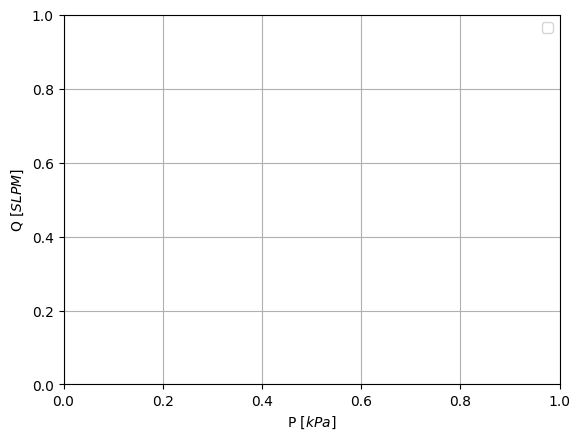

In [54]:
# Plot sliced data and extract opening pressure 
P_open = []
P_close = []

open_threshold = 0.01 # slpm
close_threshold = 0.0025 # slpm

# Initialize a flag to indicate whether the threshold has been crossed from below
crossed_threshold = False

for sample in data_sliced:   
    # Initialize lists for each sample
    P_open_sample = []
    P_close_sample = []
    
    for run in sample:
        Q = run['Rescaled_Flow']
        P_sliced = run['Pressure']
        
        # Extract opening pressure
        opening_index = np.argmax(Q > open_threshold)  # If the flow passes a certain threshold, then we can assume it is open
        P_open_sample.append(P_sliced[opening_index])  # Use previous index to recover the pressure 
        
        # Loop through the data
        for jj in range(1, len(Q)):
            # Check for crossing the threshold from below to above
            if Q[jj] > close_threshold:
                crossed_threshold = True
            
            # Check for crossing the threshold from above to below after it's been crossed from below
            if crossed_threshold and Q[jj] < close_threshold:
                P_close_sample.append(P_sliced[jj])
                
                # Reset the flag if you are only interested in the first such occurrence
                crossed_threshold = False
    
    # Append the lists for each sample to the main lists
    P_open.append(P_open_sample)
    P_close.append(P_close_sample)

plt.ylabel('Q [$SLPM$]')
plt.xlabel('P [$kPa$]')
plt.legend()
plt.grid()
plt.show()


In [34]:
P_open[5]

[12.15686324362109,
 9.478835326000995,
 9.69203034888429,
 9.821973712728681,
 9.904408295108539,
 9.977387328289314,
 10.171840303117689,
 10.206839359181764,
 10.210620451859109,
 10.260552288243549,
 10.30499562348382,
 10.286315560554756,
 10.303029004490687,
 10.343792677259561,
 10.377828146367113,
 10.39279473675613,
 10.41406690494835,
 10.437756493049035,
 10.481630692133706,
 10.50201816352958,
 10.528254776801894,
 10.464505892362535,
 10.518962642934616,
 10.536831264216078,
 10.539231779090219,
 10.551178003346514,
 10.585979834010134,
 10.57106395872409,
 10.58409210517718,
 10.593395509067342]

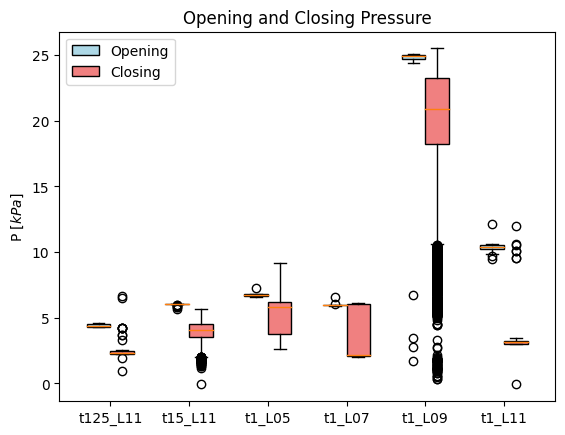

In [61]:
fig, ax = plt.subplots()

# Width of a boxplot
box_width = 0.3

# Positions of the opening pressure boxplots
open_positions = [x - box_width/2 for x in range(len(P_open))]

# Positions of the closing pressure boxplots
close_positions = [x + box_width/2 for x in range(len(P_close))]

# Plot the opening pressure boxplots
bp_open = ax.boxplot(P_open, positions=open_positions, widths=box_width, patch_artist=True, boxprops=dict(facecolor='lightblue'), labels=['Opening']*len(P_open))

# Plot the closing pressure boxplots
bp_close = ax.boxplot(P_close, positions=close_positions, widths=box_width, patch_artist=True, boxprops=dict(facecolor='lightcoral'), labels=['Closing']*len(P_close))

# Set the title and labels
plt.title("Opening and Closing Pressure")
plt.ylabel("P [$kPa$]")

# Extract the part of the sample name after "t"
sample_names_after_t = ['t'+name.split('t')[-1] for name in sample_names]

# Sort sample names and corresponding data
sorted_indices = sorted(range(len(sample_names_after_t)), key=lambda k: sample_names_after_t[k])
sorted_names_after_t = [sample_names_after_t[i] for i in sorted_indices]
sorted_P_open = [P_open[i] for i in sorted_indices]
sorted_P_close = [P_close[i] for i in sorted_indices]

# Set the x-ticks and labels
tick_positions = range(len(sorted_names_after_t))
plt.xticks(tick_positions, sorted_names_after_t)

# Show the legend
handles = [bp_open['boxes'][0], bp_close['boxes'][0]]
labels = ['Opening', 'Closing']
ax.legend(handles, labels)

plt.show()

# Create a colormap
colormap = cm.get_cmap('viridis')

# Normalize the time variable to fit the colormap scale
norm_time = (time - time.min()) / (time.max() - time.min())

# Loop through and plot each segment with corresponding color
for i in range(len(time) - 1):
    plt.scatter(P[i:i+10]/1000, flow[i:i+10], color=colormap(norm_time[i]))

# Add a colorbar to represent the time variable
sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
sm.set_array([])
plt.colorbar(sm, label='Time [s]')

plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
plt.title('Pressure vs Flow Colored by Time')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)


save_plot('Pressure_vs_flow')


In [58]:
sample_names = data[1]['Samplename']
sample_names

['DS30_r9_t1_L11',
 'DS30_r9_t1_L09',
 'DS30_r9_t1_L07',
 'DS30_r9_t1_L05',
 'DS30_r9_t15_L11',
 'DS30_r9_t125_L11']